In [1]:
import pandas as pd
import requests
import subprocess
import os
import numpy as np
from datetime import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
%matplotlib inline
pd.set_option('display.max_rows',500)
mpl.rcParams['figure.figsize']=(16,9)

In [3]:
os.getcwd()

'C:\\Users\\Sriram\\eds_covid-19\\notebooks'

In [4]:
git_pull = subprocess.Popen( "git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b'From https://github.com/CSSEGISandData/COVID-19\n   8cc99e02..6901d49a  web-data   -> origin/web-data\n'
out : b'Already up to date.\n'


In [5]:
datapath='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
JH_data_raw=pd.read_csv(datapath)
JH_data_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [6]:
time_index=JH_data_raw.columns[4:]
df_for_plot=pd.DataFrame({'date':time_index})
len(df_for_plot)

215

In [7]:
JH_data_raw['Country/Region'].unique()
JH_data_raw[JH_data_raw['Country/Region']=='United Kingdom'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         2
2/1/20          2
2/2/20          2
2/3/20          8
2/4/20          8
2/5/20          9
2/6/20          9
2/7/20          9
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        15
2/12/20        16
2/13/20        17
2/14/20        18
2/15/20        18
2/16/20        18
2/17/20        19
2/18/20        19
2/19/20        20
2/20/20        22
2/21/20        23
2/22/20        23
2/23/20        28
2/24/20        30
2/25/20        34
2/26/20        37
2/27/20        44
2/28/20        56
2/29/20        61
3/1/20         94
3/2/20        134
3/3/20        189
3/4/20        246
3/5/20        295
3/6/20        374
3/7/20        429
3/8/20        483
3/9/20        630
3/10/20       889
3/11/20      1301
3/12/20      1790
3/13/20      2270
3/14/20      2634
3/15/20      3077
3/16/20      3692
3/17/20   

In [8]:
country_list=['Germany', 'United Kingdom','India','US']
for country in country_list:
    df_for_plot[country]=np.array(JH_data_raw[JH_data_raw['Country/Region']==country].iloc[:,4::].sum(axis=0))
len(df_for_plot)

215

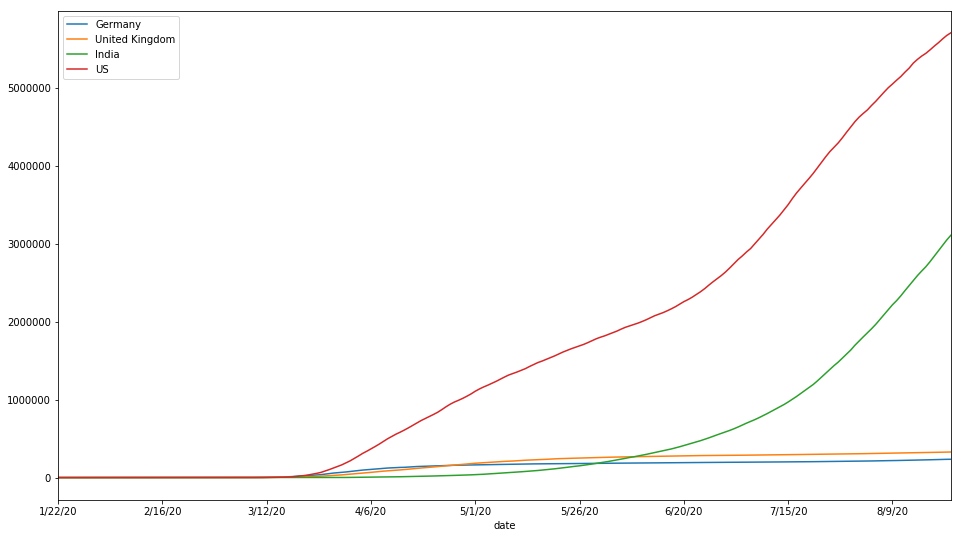

In [9]:
df_for_plot.set_index('date').plot()

In [10]:
type(df_for_plot.date[0])

str

In [11]:
#Converting datetime string into datetime object
time_index=[datetime.strptime(each,"%m/%d/%y") for each in df_for_plot.date]
#Converting datetime object into datetime string of another format
time_str=[datetime.strftime(each,'%Y-%m-%d') for each in time_index]

In [12]:
df_for_plot['date']=time_index
type(df_for_plot.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df_for_plot.head()

,date,Germany,United Kingdom,India,US
0,2020-01-22,0,0,0,1
1,2020-01-23,0,0,0,1
2,2020-01-24,0,0,0,2
3,2020-01-25,0,0,0,2
4,2020-01-26,0,0,0,5


In [14]:
df_for_plot.to_csv('../data/processed/COVID_JH_data_small_flat_table.csv',sep=';',index=False )

In [15]:
JH_data_base=JH_data_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
JH_data_base=JH_data_base.drop(['Lat','Long'],axis=1)
pd_JH_relational_model=JH_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

In [16]:
pd_JH_relational_model[pd_JH_relational_model['country']=='Germany']

,date,state,country,confirmed
64,1/22/20,NaN,Germany,0.0
330,1/22/20,Zhejiang,Germany,0.0
516,1/23/20,NaN,Germany,0.0
782,1/23/20,Zhejiang,Germany,0.0
968,1/24/20,NaN,Germany,0.0
1234,1/24/20,Zhejiang,Germany,0.0
1420,1/25/20,NaN,Germany,0.0
1686,1/25/20,Zhejiang,Germany,0.0
1872,1/26/20,NaN,Germany,0.0
2138,1/26/20,Zhejiang,Germany,0.0


In [17]:
pd_JH_relational_model['date']=pd_JH_relational_model.date.astype('datetime64[ns]')

In [18]:
pd_JH_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

<Figure size 1152x648 with 0 Axes>

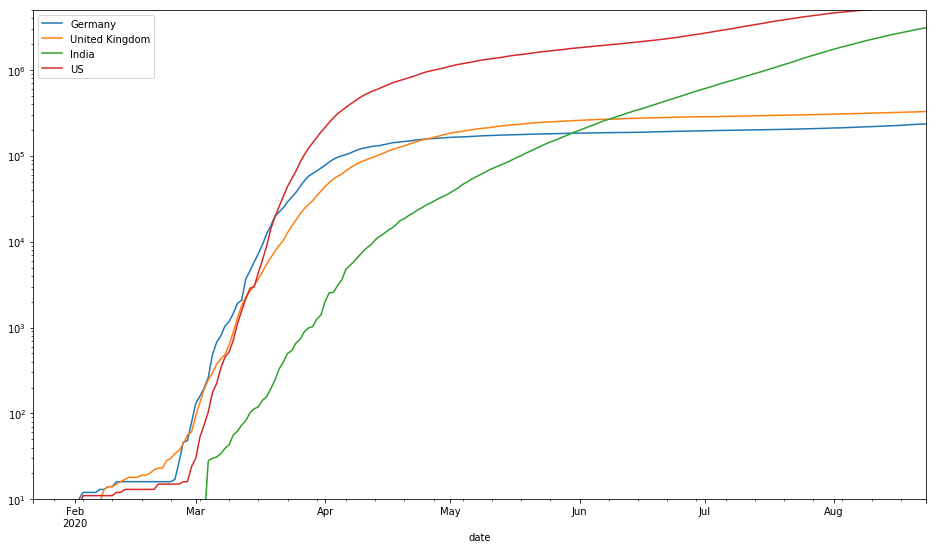

In [19]:
plt.figure()
ax=df_for_plot.set_index('date').plot()
plt.ylim(10,5000000)
ax.set_yscale('log')

# Applying Groupby function

In [48]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.iloc[0:6,:]

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cuba,0.0
2,2020-01-22,Zhejiang,Croatia,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0
5,2020-01-22,Zhejiang,Congo (Kinshasa),0.0


In [49]:
test_JH_data=pd_JH_data[((pd_JH_data['country']=='US')|(pd_JH_data['country']=='Germany'))
                     &(pd_JH_data['date']>='2020-08-15')]
test_JH_data.head()

,date,state,country,confirmed
93145,2020-08-15,Zhejiang,Germany,224488.0
93267,2020-08-15,Zhejiang,US,5361165.0
93356,2020-08-15,NaN,Germany,224488.0
93474,2020-08-15,NaN,US,5361165.0
93597,2020-08-16,Zhejiang,Germany,225007.0


In [50]:
test_JH_data.groupby(['state','country']).agg(np.max)

date  confirmed
state    country                      
Zhejiang Germany 2020-08-23   234494.0
         US      2020-08-23  5701679.0

In [51]:
# %load ../src/features/build_features.py
"""
Created on Sat Aug 22 10:32:53 2020

@author: Sriram
"""

import numpy as np
from sklearn import linear_model

reg=linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    " Use linear regression to find the doubling rate"
    X=np.arange(-1,2).reshape(-1,1)
    y=np.array(in_array)
    # for safety we are asserting that the length of the input array is 3
    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_
    return intercept/slope

if __name__=='__main__':
    test_data=np.array([2,4,6])
    doubling_time=get_doubling_time_via_regression(test_data)
    print('Test slope is :'+str(doubling_time))


Test slope is :[2.]


In [52]:
def rolling_reg(df_input,col='confirmed'):
    "Input is dataframe"
    "return value is a single series of doubling rates"
    days_back=3
    result=df_input[col].rolling(window=days_back,min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [53]:
test_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country       
Zhejiang  Germany  93145           NaN
                   93597           NaN
                   94051    203.795961
                   94501    145.588821
                   94953    151.813262
                   95406    144.833544
                   95858    139.237035
                   96312    181.181264
                   96762    319.173606
          US       93267           NaN
                   93718           NaN
                   94170    139.992250
                   94622    137.401816
                   95075    119.859707
                   95525    120.937005
                   95980    120.268425
                   96430    120.541818
                   96880    143.134915
Name: confirmed, dtype: float64

In [54]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [55]:
type(pd_DR_result)

pandas.core.frame.DataFrame

In [56]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate','level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2157,NaN


In [57]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,2020-01-22,Zhejiang,Cuba,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0


In [58]:
pd_JH_result_large=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')
pd_JH_result_large.head()

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN


# Filtering data with Savgol Filter and Groupby apply

In [59]:
#from scipy import signal

In [60]:
def savgol_filter(df_input,column='confirmed',window=5,degree=1):
    df_result=df_input
    # we fill the missing entries with zero
    filter_in=df_input[column].fillna(0)
    df_result[column+'_filtered']=signal.savgol_filter(np.array(filter_in),
                        window,
                        degree)
    return df_result

In [61]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter)

In [62]:
pd_filtered_result=pd_filtered_result.reset_index()
pd_filtered_result.head()

,index,state,country,confirmed,confirmed_filtered
0,0,NaN,NaN,NaN,NaN
1,1,Zhejiang,Cuba,0.0,0.0
2,2,Zhejiang,Croatia,0.0,0.0
3,3,Zhejiang,Cote d'Ivoire,0.0,0.0
4,4,Zhejiang,Costa Rica,0.0,0.0


In [63]:
pd_JH_result_large=pd.merge(pd_JH_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_JH_result_large.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0


# Applying doubling rate on Filtered Data

In [64]:
pd_filtered_doubling_result=pd_JH_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()
pd_filtered_doubling_result.head()

,state,country,level_2,confirmed_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2157,NaN


In [65]:
pd_filtered_doubling_result=pd_filtered_doubling_result.rename(columns={'confirmed_filtered':'doubling_rate_filtered','level_2':'index'})
pd_filtered_doubling_result.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2157,NaN


In [66]:
pd_JH_result_large=pd.merge(pd_JH_result_large,pd_filtered_doubling_result[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_JH_result_large.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [67]:
# we apply a threshold on confirmed column since if values are small doubling rate goes to infinity
mask=pd_JH_result_large['confirmed']>100
pd_JH_result_large['doubling_rate_filtered']=pd_JH_result_large['doubling_rate_filtered'].where(mask,other=np.NaN)

In [68]:
pd_JH_result_large.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [69]:
pd_JH_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)